In [1]:
#pip install cryptocompare

In [2]:
import cryptocompare
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
# Get the API key from the Quantra file located inside the data_modules folder
# cryptocompare_API_key = 'Insert_here_your_api_key'

# Set the API key in the cryptocompare object
# cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_API_key)

# print("API Key set!")

API Key set!


In [3]:
# Fetch the raw ticker list
raw_ticker_data = cryptocompare.get_coin_list()

# Convert the raw data from dictionary format to DataFrame
all_tickers = pd.DataFrame.from_dict(raw_ticker_data).T

# Preview the first 6 columns and the last 5 rows of the ticker list
all_tickers.iloc[:, :5].tail()

,Id,Url,ImageUrl,ContentCreatedOn,Name
GAS,213532,/coins/gas/overview,/media/37747638/gas.png,1502289483,GAS
QUICKOLD,939226,/coins/quickold/overview,/media/39109040/quick.png,1613560474,QUICKOLD
QUICK,953072,/coins/quick/overview,/media/39109040/quick.png,1680269271,QUICK
FASTSWAP,944613,/coins/fastswap/overview,/media/38554203/fast.png,1637075636,FASTSWAP
FAST,953088,/coins/fast/overview,/media/44082022/fast.png,1680276887,FAST


In [4]:
# Define the ticker symbol and other details
ticker_symbol = 'BTC'
currency = 'USD'
limit_value = 2000
exchange_name = 'CCCAGG'
data_before_timestamp = datetime(2021, 5, 1, 0, 0)

In [33]:

# For daily data
# cryptocompare.get_historical_price_day(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For hourly data
# cryptocompare.get_historical_price_hour(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# For minute data
# cryptocompare.get_historical_price_minute(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)


In [5]:
# Fetch the raw price data

raw_price_data = \
    cryptocompare.get_historical_price_hour(
        ticker_symbol,
        currency,
        limit=limit_value,
        exchange=exchange_name,
        toTs=data_before_timestamp
    )

# Convert the raw price data into a DataFrame
hourly_price_data = pd.DataFrame.from_dict(raw_price_data)

# Set the time columns as index and convert it to datetime
hourly_price_data.set_index("time", inplace=True)
hourly_price_data.index = pd.to_datetime(hourly_price_data.index, unit='s')
hourly_price_data['datetimes'] = hourly_price_data.index
hourly_price_data['datetimes'] = hourly_price_data['datetimes'].dt.strftime(
    '%Y-%m-%d')

# Preview the last 5 values of the the first 7 columns of the DataFrame
hourly_price_data.iloc[:, :6].tail(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-05-01 00:00:00,58139.04,57507.83,57757.97,2640.32,1.529670e+08,57870.74
2021-05-01 01:00:00,58487.33,57554.04,57870.74,2218.86,1.288773e+08,58477.80
2021-05-01 02:00:00,58498.65,57999.97,58477.80,1593.32,9.288119e+07,58160.96
2021-05-01 03:00:00,58287.36,58109.27,58160.96,918.37,5.346703e+07,58230.76
2021-05-01 04:00:00,58277.45,57775.23,58230.76,1058.49,6.141323e+07,58107.72


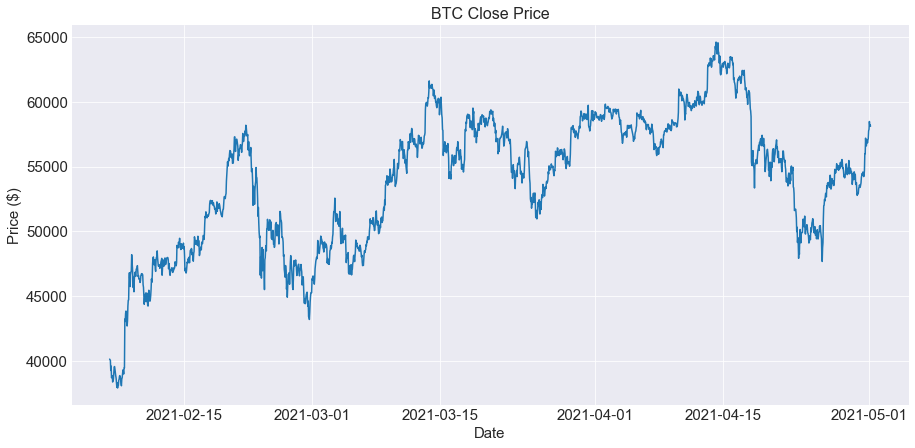

In [6]:
# Plot the close price
plt.figure(figsize=(15, 7))
plt.plot(hourly_price_data.close)

# Set title and labels for the plot
plt.title('BTC Close Price', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

# Show the plot
plt.show()